In [74]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
df_times = pd.read_csv("Computation_times_list.csv",delimiter=";")
df_times

,Problem,Sub-problem,case,variable,value
0,NNAEPC,Training - single,3-bus,Computation time,5.300000e+01
1,NNAEPC,Training - sum 96,3-bus,Computation time,3.631000e+03
2,NNAEPC,Evaluation,3-bus,Computation time,2.100000e-03
3,NNAEPC,Relaxed ESOM -reduced,3-bus,Computation time,3.530000e+02
4,NNAEPC,Relaxed ESOM -reduced,3-bus,nb variables,9.959600e+04
5,NNAEPC,Training - single,9n,Computation time,2.350000e+02
6,NNAEPC,Training - sum 96,9n,Computation time,1.995100e+04
7,NNAEPC,Relaxed ESOM -reduced,9n,nb variables,4.052170e+05
8,NNAEPC,Relaxed ESOM -reduced,9n,Computation time,4.279000e+03
9,NNAEPC,Evaluation,9n,Computation time,1.000000e-02


<Axes: xlabel='case'>

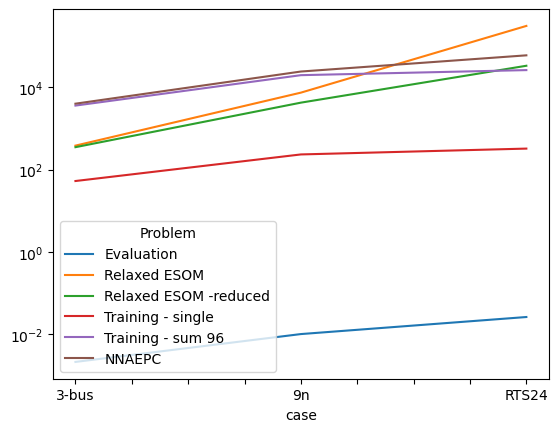

In [76]:
#fig, axs = plt.subplots(1,2,sharey = True)
fig, axs = plt.subplots(1)
f = (df_times["Sub-problem"] == "Relaxed ESOM" )& (df_times["variable"] == "Computation time" )
f = (df_times["variable"] == "Computation time" )& (df_times["Problem"] != "Binary" ) #& (df_times["Sub-problem"] != "Training - sum 96" )
f_2 = (df_times["variable"] == "Computation time" )& (df_times["Problem"] == "NNAEPC" )
f_3 = (df_times["variable"] == "Computation time" )& (df_times["Problem"] == "Binary" )

# df_times.groupby("case").plot(kind = "bar",subplots = False)
df_times[f].pivot_table(values = "value",index = ["case"],columns = "Sub-problem").plot(logy = True,ax = axs)
df_times[f_2].pivot_table(values = "value",index = ["case"],columns = "Problem",aggfunc ="sum").plot(logy = True,label = "Total Time NNAEPC" ,ax = axs)

In [79]:
pv = df_times[f].pivot_table(values = "value",index = ["case"],columns = "Sub-problem")
evalu = pv["Evaluation"]
Relaxed_12w = pv["Relaxed ESOM -reduced"]
Training = pv["Training - sum 96"]
total_NN = df_times[f_2].pivot_table(values = "value",index = ["case"],columns = "Problem",aggfunc ="sum")
Training_s = pv["Training - single"]
Relaxed_fy = pv["Relaxed ESOM"]
Binary_fy = df_times[f_3].pivot_table(values = "value",index = ["case"],columns = "Problem",aggfunc ="sum")

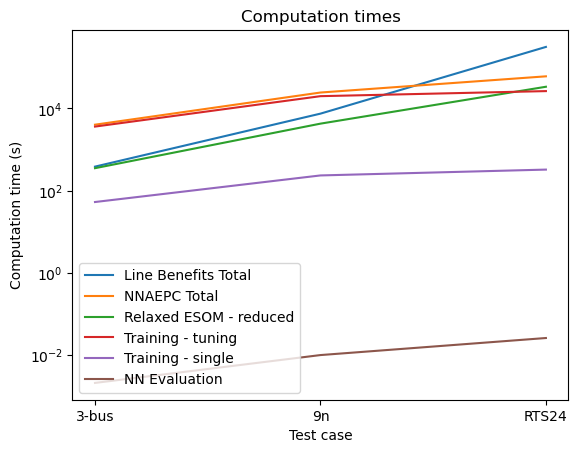

In [80]:
plt.plot(Relaxed_fy,label = "Line Benefits Total")
plt.plot(total_NN,label = "NNAEPC Total")
#plt.plot(Binary_fy,label = "Binary problem")
plt.plot(Relaxed_12w,label = "Relaxed ESOM - reduced")
plt.plot(Training, label = "Training - tuning")
plt.plot(Training_s, label = "Training - single")
plt.plot(evalu,label = "NN Evaluation")
plt.legend()
plt.yscale("log")
plt.xlabel("Test case")
plt.ylabel("Computation time (s)")
plt.title("Computation times")
plt.savefig("Computation_times")

<Axes: xlabel='case'>

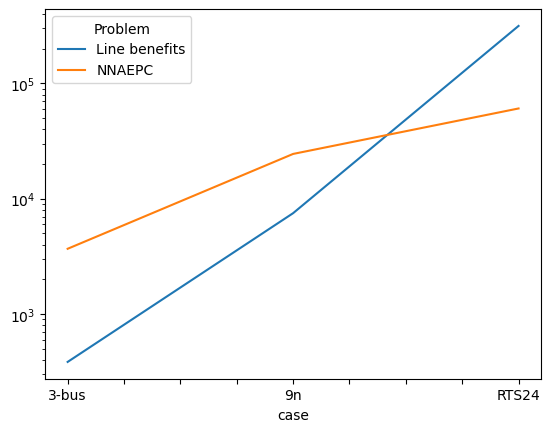

In [34]:
df_times[f].pivot_table(values = "value",index = ["case"],columns = "Problem",aggfunc ="sum").plot(logy = True)